In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
# cnn 모델 구축

cnn = Sequential()

cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters = 64, activation = 'relu'))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Epoch 1/30
469/469 [==============================] - 108s 227ms/step - loss: 0.2081 - accuracy: 0.9372 - val_loss: 0.0502 - val_accuracy: 0.9849
Epoch 2/30
469/469 [==============================] - 107s 228ms/step - loss: 0.0777 - accuracy: 0.9769 - val_loss: 0.0438 - val_accuracy: 0.9863
Epoch 3/30
469/469 [==============================] - 107s 228ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0325 - val_accuracy: 0.9884
Epoch 4/30
469/469 [==============================] - 107s 228ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0289 - val_accuracy: 0.9904
Epoch 5/30
469/469 [==============================] - 107s 228ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0316 - val_accuracy: 0.9891
Epoch 6/30
469/469 [==============================] - 106s 227ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0297 - val_accuracy: 0.9916
Epoch 7/30
469/469 [==============================] - 107s 229ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0285 -

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0458 - accuracy: 0.9909


[0.045827656984329224, 0.9908999800682068]

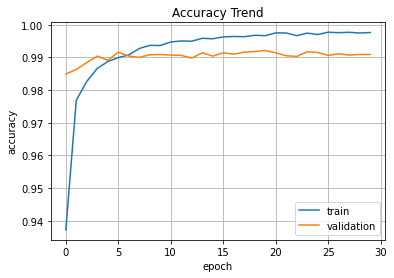

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy Trend")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

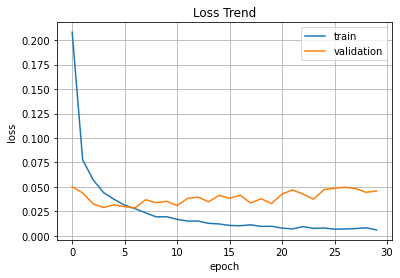

In [8]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()